In [1]:
import sys
sys.path.insert(0, "celadro_3D_scripts_final/plot/")
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from mpl_toolkits.axes_grid1 import make_axes_locatable
import plot
import archive
import animation
import gc
import zlib
from sklearn.metrics import mutual_info_score

/home/siavash/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
ar = archive.loadarchive('mpress-full')
xsec = 8
max_delta = 50
N = 121

### Plot Kolmogorov Complexity

In [3]:
def approximate_kolmogorov_complexity(field):
    field = field.ravel()
    byte_string = str(field).encode('utf-8')
    compressed_data = zlib.compress(byte_string)
    return len(compressed_data)

def get_isotropic_stress(frame):
    sxx = frame.field_sxx
    sxx = np.reshape(sxx,(frame.parameters['Size'][2],frame.parameters['Size'][0],frame.parameters['Size'][1]))
    syy = frame.field_syy
    syy = np.reshape(syy,(frame.parameters['Size'][2],frame.parameters['Size'][0],frame.parameters['Size'][1]))
    szz = frame.field_szz
    szz = np.reshape(szz,(frame.parameters['Size'][2],frame.parameters['Size'][0],frame.parameters['Size'][1]))
    p = (1/3)*(sxx+syy+szz)
    p = p[xsec,:,:]
    return p
    
def measure_kc_ratio_over_deltas(ar,N,xsec,max_delta=50):
    avg_kc_ratio = []
    var_kc_ratio = []
    for i in range(max_delta): 
        kc_ratios = []
        for j in range(N-i-1):
            field_j = ar.read_frame(j)
            p_j = get_isotropic_stress(field_j)
            field_ij = ar.read_frame(j+i)
            p_ij = get_isotropic_stress(field_ij)
            kc_j = approximate_kolmogorov_complexity(p_j)
            kc_ij = approximate_kolmogorov_complexity(p_ij)
            kc_ratio = kc_ij/kc_j
            kc_ratios.append(kc_ratio)
            '''
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))  # Create a figure with two subplots
            im1 = ax1.imshow(p_j, interpolation='lanczos', cmap='jet', origin='lower')
            fig.colorbar(im1, ax=ax1, orientation='horizontal')
            im2 = ax2.imshow(p_ij, interpolation='lanczos', cmap='jet', origin='lower')
            fig.colorbar(im2, ax=ax2, orientation='horizontal')
            plt.show()
            '''
        avg_kc_ratio.append(np.mean(kc_ratios))
        var_kc_ratio.append(np.var(kc_ratios))
        print('done computing delta: ',i)
    return range(1,max_delta),avg_kc_ratio,var_kc_ratio
                  

In [4]:
time, mean, var = measure_kc_ratio_over_deltas(ar,N,xsec,max_delta)

fig = plt.figure(figsize=(4,4))
plt.plot(mean)
plt.title('mean')
plt.show()

fig = plt.figure(figsize=(4,4))
plt.plot(var)
plt.title('var')
plt.show()

done computing delta:  25
done computing delta:  26
done computing delta:  27
done computing delta:  28
done computing delta:  29
done computing delta:  30
done computing delta:  31
done computing delta:  32
done computing delta:  33
done computing delta:  34
done computing delta:  35
done computing delta:  36
done computing delta:  37
done computing delta:  38
done computing delta:  39
done computing delta:  40
done computing delta:  41
done computing delta:  42
done computing delta:  43
done computing delta:  44
done computing delta:  45
done computing delta:  46
done computing delta:  47
done computing delta:  48
done computing delta:  49


### Plot Mutual Information

In [11]:
def discretize(data, nbins=16):
    data = data.ravel()
    data_min, data_max = np.min(data), np.max(data)
    if data_min == data_max:
        return np.zeros_like(data, dtype=int)
    
    bin_edges = np.linspace(data_min, data_max, nbins + 1)
    bin_indices = np.digitize(data, bin_edges) - 1
    bin_indices = np.clip(bin_indices, 0, nbins-1)
    return bin_indices

def mutual_info_sklearn(x, y, nbins=16):
    x_disc = discretize(x, nbins)
    y_disc = discretize(y, nbins)
    mi_value = mutual_info_score(x_disc, y_disc)
    return mi_value

def measure_MI_over_deltas(ar,N,xsec,max_delta=50):
    #N = ar._nframes
    #N = 604
    avg_MI_ratio = []
    var_MI_ratio = []
    for i in range(1,max_delta): 
        MIs = []
        for j in range(N-i):
            field_j = ar.read_frame(j)
            p_j = get_isotropic_stress(field_j)
            field_ij = ar.read_frame(j+i)
            p_ij = get_isotropic_stress(field_ij)
            MI = mutual_info_sklearn(p_j,p_ij)
            MIs.append(MI)
            
        avg_MI_ratio.append(np.mean(MIs))
        var_MI_ratio.append(np.var(MIs))
        print('done computing delta: ',i)
    return range(1,max_delta),avg_MI_ratio,var_MI_ratio

done computing delta:  1
done computing delta:  2
done computing delta:  3
done computing delta:  4
done computing delta:  5
done computing delta:  6
done computing delta:  7
done computing delta:  8
done computing delta:  9
done computing delta:  10
done computing delta:  11
done computing delta:  12
done computing delta:  13
done computing delta:  14
done computing delta:  15
done computing delta:  16
done computing delta:  17
done computing delta:  18
done computing delta:  19
done computing delta:  20
done computing delta:  21
done computing delta:  22
done computing delta:  23
done computing delta:  24
done computing delta:  25
done computing delta:  26
done computing delta:  27
done computing delta:  28
done computing delta:  29
done computing delta:  30
done computing delta:  31
done computing delta:  32
done computing delta:  33
done computing delta:  34
done computing delta:  35
done computing delta:  36
done computing delta:  37
done computing delta:  38
done computing delta:

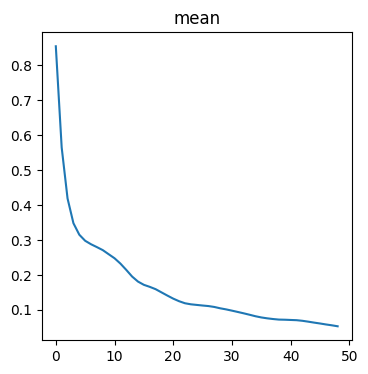

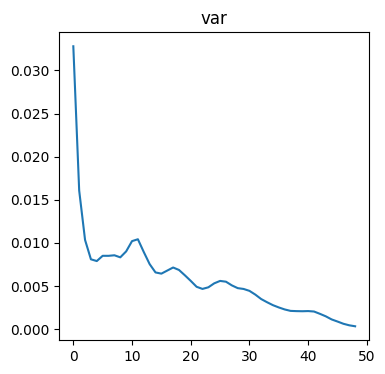

In [12]:
time, mean, var = measure_MI_over_deltas(ar,N,xsec,max_delta)

fig = plt.figure(figsize=(4,4))
plt.plot(mean)
plt.title('mean')
plt.show()

fig = plt.figure(figsize=(4,4))
plt.plot(var)
plt.title('var')
plt.show()

### Plot Transfer Entropy

### Plot Stress Fields

In [ ]:
rng = np.arange(1,ar._nframes+1,1)
for i in rng: 
    #fname = ''
    print(i)
    frame = ar.read_frame(i)
    '''
    sxx = frame.field_sxx
    sxx = np.reshape(sxx,(frame.parameters['Size'][2],frame.parameters['Size'][0],frame.parameters['Size'][1]))
    syy = frame.field_syy
    syy = np.reshape(syy,(frame.parameters['Size'][2],frame.parameters['Size'][0],frame.parameters['Size'][1]))
    szz = frame.field_szz
    szz = np.reshape(szz,(frame.parameters['Size'][2],frame.parameters['Size'][0],frame.parameters['Size'][1]))
    p = (1/3)*(sxx+syy+szz)
    p = p[xsec,:,:]
    '''
    '''
    fig, ax = plt.subplots(figsize=(4, 4))
    im = ax.imshow(p[xsec, :, :], interpolation='lanczos', cmap='jet', origin='lower')
    plt.colorbar(im, orientation='horizontal')
    plt.show()
    '''
    del frame



In [ ]:
print(ar._ninfo)